# Image classification of dog breeds

This project outlines a pipeline for an image classification engine. As a POC this engine detects the breed of a dog given an image.

The deployment is done using sagemaker infrastructure kernel = conda_amazonei_pytorch_latest_p36.

In [69]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
import urllib
import zipfile
import os
import matplotlib.pyplot as plt
from IPython.display import Image as ipythonImage
from PIL import Image

## Dataset
Getting data and making it avaiable in s3

In [4]:
#download the data for classification
urllib.request.urlretrieve("https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip", "data/dogImages.zip")

('data/dogImages.zip', <http.client.HTTPMessage at 0x7fa7e0a9d080>)

In [5]:
import zipfile
with zipfile.ZipFile("data/dogImages.zip", 'r') as zip_ref:
    zip_ref.extractall("data")


The dataset contains a selection of dog picures divided into 133 breeds. We can see their distribution in the graph below

In [24]:
dog_breeds = os.listdir('data/dogImages/train')
breed_count = []
for breed in dog_breeds:
    breed_count.append(len(os.listdir(os.path.join('data/dogImages/train',breed))))

<BarContainer object of 133 artists>

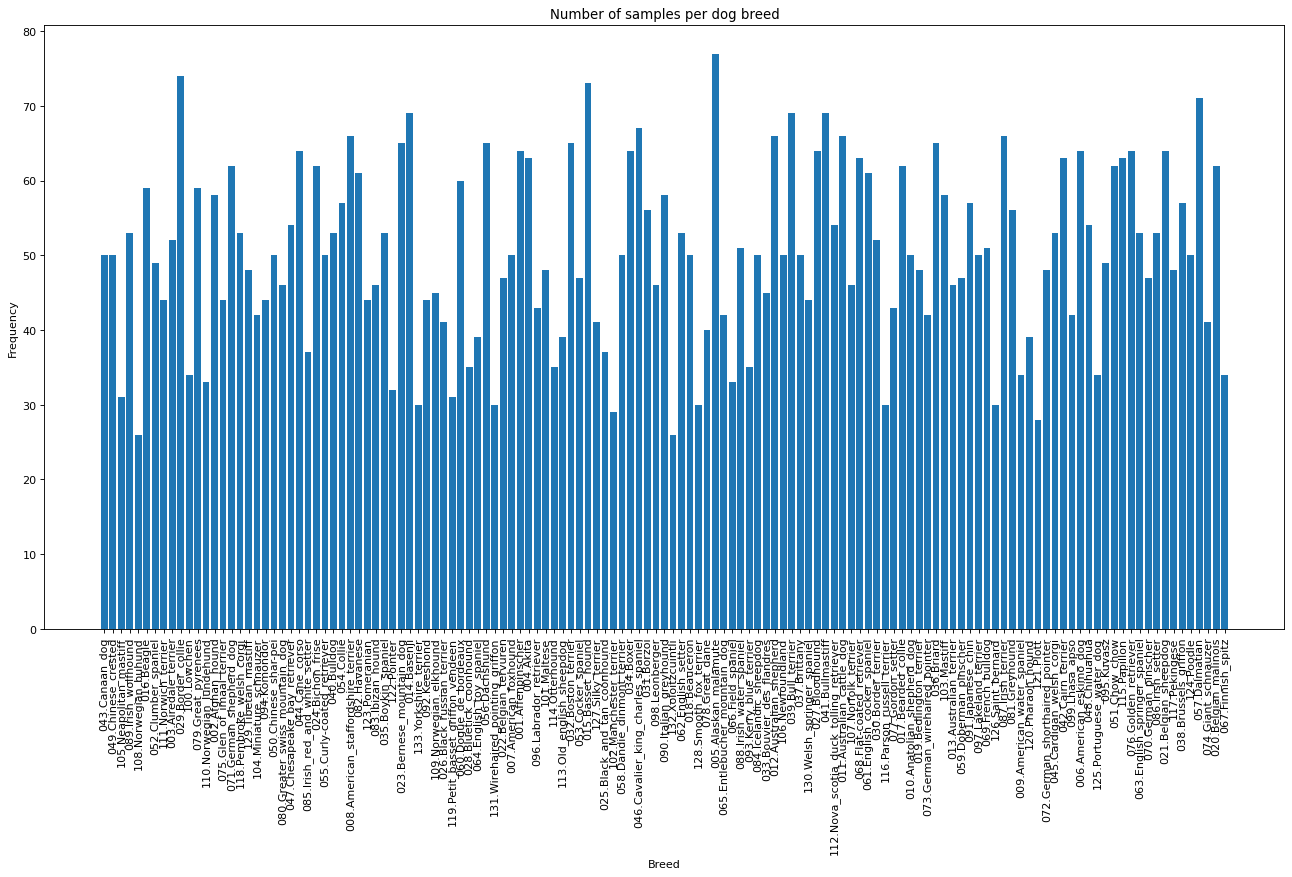

In [40]:
plt.figure(figsize=(20, 10), dpi=80)
plt.xticks(rotation='vertical')
plt.title("Number of samples per dog breed")
plt.xlabel('Breed')
plt.ylabel('Frequency')
plt.bar(dog_breeds,breed_count)

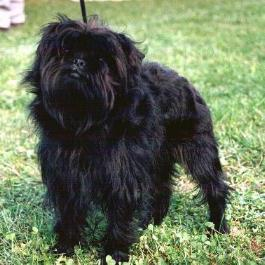

In [81]:
#Sample image
ipythonImage(filename='data/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg') 

In [45]:
#uploading the data into S3
from sagemaker import Session
session = Session()
bucket= session.default_bucket()

In [47]:
os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./data/dogImages s3://${DEFAULT_S3_BUCKET}/dogImages/

upload: data/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://sagemaker-ap-northeast-1-985768962182/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: data/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg to s3://sagemaker-ap-northeast-1-985768962182/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg
upload: data/dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg to s3://sagemaker-ap-northeast-1-985768962182/dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg
upload: data/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://sagemaker-ap-northeast-1-985768962182/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: data/dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg to s3://sagemaker-ap-northeast-1-985768962182/dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg
upload: data/dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg to s3://sagemaker-ap-northeast-1-985768962182/dogImages/test/001.

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [224]:
%run -i 'train_model.py'

Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [0/6680 (0%)] Loss: -0.017848
Train Epoch: 1 [1000/6680 (15%)] Loss: -2.661810
Train 

In [ ]:
#hyperparameter search space
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([32, 64, 128, 256, 512])
}

In [ ]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

estimator = PyTorch(
    entry_point="train_model.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
)

tuner = # TODO: Your HP tuner here

In [ ]:
# TODO: Fit your HP Tuner
tuner.fit() # TODO: Remember to include your data channels

In [ ]:
# TODO: Get the best estimators and the best HPs

best_estimator = #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks

In [ ]:
# TODO: Create and fit an estimator

estimator = # TODO: Your estimator here

In [ ]:
# TODO: Plot a debugging output.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output

## Model Deploying

In [ ]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy() # TODO: Add your deployment configuration like instance type and number of instances

In [ ]:
# TODO: Run an prediction on the endpoint

image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()